In [2]:
import numpy as np
import matplotlib.pyplot as plt

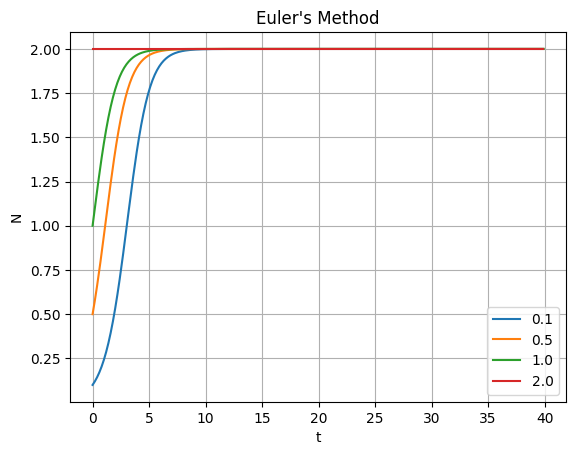

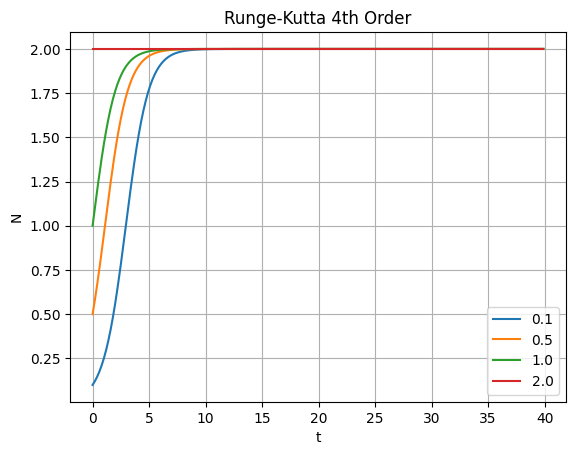

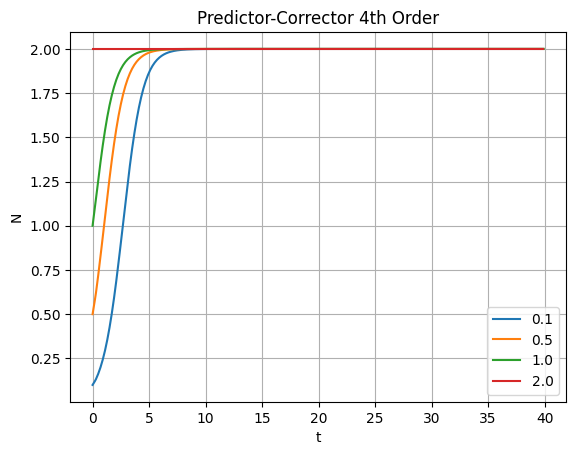

In [3]:
#ΆΣΚΗΣΗ 1

#α) Ερώτημα
def Ndot(N,c):
  return N - c*N**2

c=0.5
h=0.1
t_inf = 40
N_0 = [0.1, 0.5,1.0,2.0]

#Μέθοδος Euler
def euler_method(N_0,h):
  N = np.zeros(int(t_inf/h))
  N[0]=N_0
  for i in range(int(t_inf/h-1)):
    N[i+1] = N[i] + h*Ndot(N[i],c)
  return N

for j in range(len(N_0)):
  N_euler = euler_method(N_0[j],h)
  plt.plot(np.arange(0,t_inf,h), N_euler,label=N_0[j])
plt.title("Euler's Method")
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('N')
plt.show()

#Μεθοδος Runge-Kutta 4ης τάξης
def runge_kutta_4th_order(N_0, h,c):
    N = np.zeros(int(t_inf / h))
    N[0] = N_0
    t = np.arange(0, t_inf, h)
    for i in range(len(t)-1):
        k1 = Ndot(N[i],c)
        k2 = Ndot(N[i] + 0.5*h * k1, c)
        k3 = Ndot(N[i] + 0.5 *h* k2, c)
        k4 = Ndot(N[i] + h*k3, c)
        N[i + 1] = N[i] + (h/6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return N, t


for j in range(len(N_0)):
    N_runge, t = runge_kutta_4th_order(N_0[j], h,c)
    plt.plot(t, N_runge, label=N_0[j])


plt.title("Runge-Kutta 4th Order")
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('N')
plt.show()

#Μέθοδος Predictor-Corrector
def predictor_corre_4th_order(N_0, h):
    N = np.zeros(int(t_inf / h))
    N[0] = N_0
    t = np.arange(0, t_inf, h)
    #Υπολογίζουμε τις αρχικές τιμές με Runge-Kutta
    for i in range(4):
      k1 = Ndot(N[i],c)
      k2 = Ndot(N[i] + 0.5*h * k1,c)
      k3 = Ndot(N[i] + 0.5 *h* k2,c)
      k4 = Ndot(N[i] + h*k3,c)
      N[i+1] = N[i] + (h/6) * (k1 + 2 * k2 + 2 * k3 + k4)

    #Βήματα Predictor-Corrector
    for i in range(3, len(t) - 1):
      N_pred = N[i] + (h/24)*(55*Ndot(N[i],c) - 59*Ndot(N[i-1],c) + 37*Ndot(N[i-2],c) -9*Ndot(N[i-3],c))

      #Corrector
      N[i+1] = N[i] + (h/24)*(9*Ndot(N_pred,c) + 19*Ndot(N[i],c) - Ndot(N[i-1],c))
    return N, t
for j in range(len(N_0)):
    N_predictor, t = predictor_corre_4th_order(N_0[j], h)
    plt.plot(t, N_predictor, label=N_0[j])

plt.title("Predictor-Corrector 4th Order")
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('N')
plt.show()

Έχοντας εφαρμόσει και τις τρεις μεθόδους αριθμητικής επίλυσης, δύναται να ισχυριστούμε με βεβαιότητα ότι η ασυμπτωτική τιμή της λύσης είναι το N(∞) = 2.0. Επιπλέον, ο ισχυρισμός μας ενισχύεται από το γεγονός ότι, θέτοντας ως αρχική συνθήκη την τιμή N(0) = 2.0 (η οποία συμπίπτει με την N(∞), όπως υποδεικνύουν οι λύσεις για διαφορετικές αρχικές συνθήκες), η λύση που λαμβάνουμε παραμένει σταθερή.

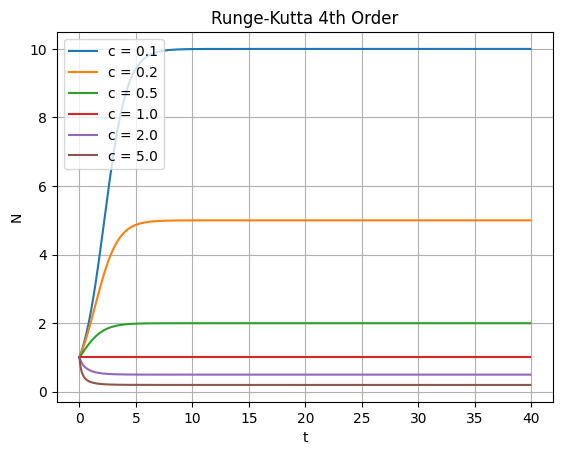

In [4]:
#β) Ερώτημα
N_0 = 1.0
cs=np.array([0.1,0.2,0.5,1.0,2.0,5.0])
N_inf = np.zeros(len(cs))
for k in range(len(cs)):
  N_new,t = runge_kutta_4th_order(N_0, h,cs[k])
  N_inf[k] = N_new[t_inf]
  plt.plot(t,N_new,label="c = " + str(cs[k]))
plt.title("Runge-Kutta 4th Order")
plt.xlabel('t')
plt.ylabel('N')
plt.legend()
plt.grid()

<ipython-input-5-836d30aca1d5>:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x, 1/x, label='1/c',color='red')


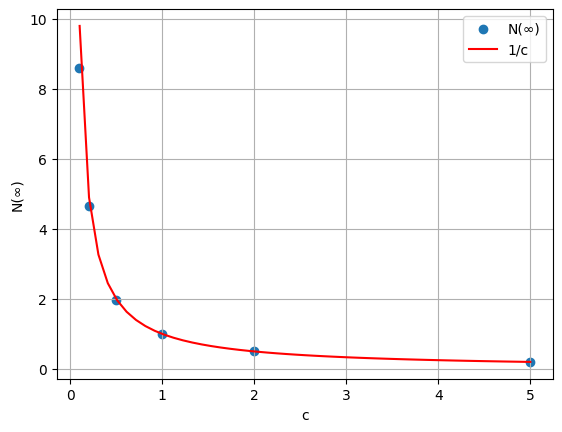

In [5]:
plt.scatter(cs,N_inf,label='N(∞)')
x = np.linspace(0,5,50)
plt.plot(x, 1/x, label='1/c',color='red')
plt.legend()
plt.xlabel('c')
plt.ylabel('N(∞)')
plt.grid()
plt.show()

Με την αρχική συνθήκη που δόθηκε στην εκφώνηση και για τις διάφορες τιμές του c, λύσαμε αριθμητικά την εξίσωση και βρήκαμε τις ασυμπτωτικές τιμές N($∞$) για κάθε c. Είναι ενδιαφέρον, για να ερμηνεύσουμε τα αποτελέσματα μας, να αναζητήσουμε μια ασυμπτωτική μορφή της N($\infty$), συναρτήσει του c. Με αφετηρία την διαφορική εξίσωση, εμείς αναμένουμε ασυμπτωτικά να μηδενίζεται ο ρυθμός αύξησης του μεγέθους που μελετάμε. Επομένως:
$$0=\frac{dN_{\infty}}{dt}=N_{\infty}-cN_{\infty}^2$$
Και για $N\neq0$:
$$N_{\infty} = \frac{1}{c}$$
Βλέπουμε λοιπόν, πως αυτό που αναμένουμε θεωρητικά είναι η ασυμπτωτική τιμή του $N$ να πέφτει σαν $1/c$ καθώς το $c$ αυξάνεται, και αυτό το επιβεβαιώνουν τα αποτελέσματα μας όπως φαίνεται στο διάγραμμα.



<ipython-input-6-ee9804e8512f>:8: RuntimeWarning: divide by zero encountered in scalar divide
  return (x-y)/(x+y)
<ipython-input-6-ee9804e8512f>:8: RuntimeWarning: invalid value encountered in scalar divide
  return (x-y)/(x+y)


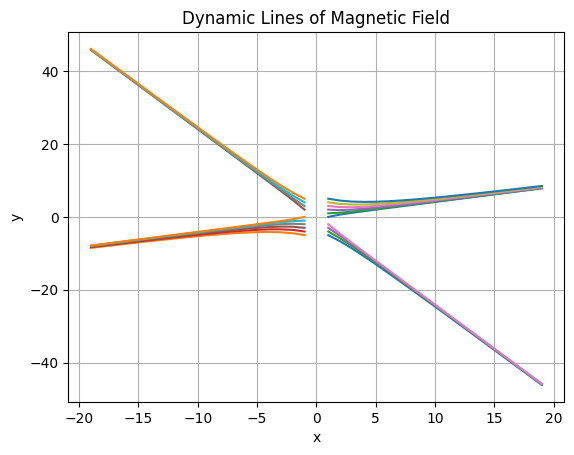

In [6]:
#Άσκηση 2
h=1
x_0 = 1
y_0 = np.arange(-5,6,1)
#y_0 = np.array([-5,-4,-3,-2,2,3,4,5])

def dydx(x,y):
  return (x-y)/(x+y)

def runge_kutta_4(dydx,x_0,y_0,x_max,h):
  stps = int((x_max-x_0)/h)
  x = np.linspace(x_0,x_max,stps+1)
  y = np.zeros(stps+1)
  y[0] = y_0


  for i in range(1,stps+1):
      try:
          k1 = dydx(x[i-1],y[i-1])
          k2 = dydx(x[i-1]+h/2, y[i-1]+k1*h/2)
          k3 = dydx(x[i-1]+h/2, y[i-1]+k2*h/2)
          k4 = dydx(x[i-1]+h, y[i-1]+k3*h)
          y[i] = y[i-1] + (h/6)*(k1+2*k2+2*k3+k4)
      except ZeroDivisionError:
          break
  return x[:i],y[:i]

for y0 in y_0:
  x1,y1 = runge_kutta_4(dydx,x_0,y0,20,h)
  x2,y2 = runge_kutta_4(dydx,-x_0,y0,-20,-h)
  plt.plot(x1,y1,label="y0 = " + str(y0))
  plt.plot(x2,y2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Dynamic Lines of Magnetic Field")
plt.grid()
plt.show()


Παρατηρούμε ότι οι δυναμικές γραμμές, οι οποίες αναπαριστώνται από τις καμπύλες στο γράφημα, δεν τέμνονται μεταξύ τους. Αυτό είναι αναμενόμενο καθώς η λύση μίας διαφορικής εξίσωσης πρέπει να είναι μοναδική για κάθε σημείο.

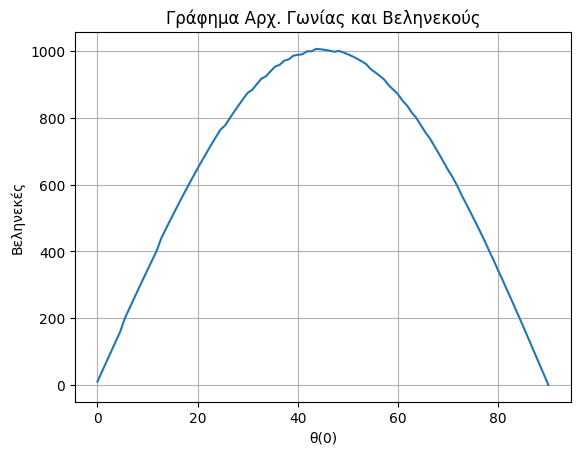

Το μέγιστο βεληνεκές είναι 1005.9903129660464 επιτυγχάνεται με αρχική γωνία ρίψης: 43.64°


In [80]:
#ΑΣΚΗΣΗ 3
#ΕΡΩΤΗΜΑ α)
g = 10
gamma_x = 0

def derivatives_x(t,x,v_x):
  dx_dt = v_x
  dv_dt = -gamma_x*v_x
  return dx_dt,dv_dt

def derivatives_y(t,y,v_y):
  dy_dt = v_y
  dv_dt = -g
  return dy_dt,dv_dt

# Runge Kutta για την x διευθυνση
def rk4_x(t0,x0,v0,h,t_max):
  n = (t_max - t0) / h
  t_values = [t0]
  x_values = [x0]
  vx_values = [v0]

  t=t0
  x=x0
  vx=v0

  while t<=t_max:
    k1_x, k1_v = derivatives_x(t,x,vx)
    k2_x, k2_v = derivatives_x(t+h/2,x+k1_x*h/2,vx+k1_v*h/2)
    k3_x, k3_v = derivatives_x(t+h/2,x+k2_x*h/2,vx+k2_v*h/2)
    k4_x, k4_v = derivatives_x(t+h,x+k3_x*h,vx+k3_v*h)

    x += (h/6)*(k1_x + 2*k2_x + 2*k3_x + k4_x)
    vx += (h/6)*(k1_v + 2*k2_v + 2*k3_v + k4_v)
    t+=h
    t_values.append(t)
    x_values.append(x)
    vx_values.append(vx)
  return np.array(t_values),np.array(x_values),np.array(vx_values)

# Runge Kutta για την y διευθυνση
def rk4_y(t0,y0,v0,h,t_max):
  n = (t_max - t0) / h
  t_values = [t0]
  y_values = [y0]
  vy_values = [v0]


  t=t0
  y=y0
  vy=v0

  while t<=t_max and y>=0:
    k1_y, k1_v = derivatives_y(t,y,vy)
    k2_y, k2_v = derivatives_y(t+h/2,y+k1_y*h/2,vy+k1_v*h/2)
    k3_y, k3_v = derivatives_y(t+h/2,y+k2_y*h/2,vy+k2_v*h/2)
    k4_y, k4_v = derivatives_y(t+h,y+k3_y*h,vy+k3_v*h)

    y += (h/6)*(k1_y + 2*k2_y + 2*k3_y + k4_y)
    vy += (h/6)*(k1_v + 2*k2_v + 2*k3_v + k4_v)
    t+=h
    t_values.append(t)
    y_values.append(y)
    vy_values.append(vy)
  return np.array(t_values),np.array(y_values),np.array(vy_values)

#Αρχικες συνθηκες
t_0 = 0
x_0 = 0
y_0 = 0
th_0 = np.linspace(0,np.pi/2,100)
v_0 = 100
vx_0 = v_0*np.cos(th_0)
vy_0 = v_0*np.sin(th_0)
x_max = []

for i in range(len(th_0)):
  t,y,vy = rk4_y(t_0,y_0,vy_0[i],0.1,100)
  t,x,vx = rk4_x(t_0, x_0,vx_0[i],0.1,100)
  x_max.append(np.max(x[:len(y)]))
  #plt.plot(x[:len(y)],y, label="θ(0) = " + str(round(np.rad2deg(th_0[i]))) + "°")#Αν θελετε να δειτε την τροχια

#plt.grid()
#plt.xlabel("x")
#plt.ylabel("y")
#plt.legend()
#plt.title("Τροχιά Πλάγιας βολής")
#plt.show()

plt.plot(np.rad2deg(th_0),x_max)
plt.grid()
plt.xlabel("θ(0)")
plt.ylabel("Βεληνεκές")
plt.title("Γράφημα Αρχ. Γωνίας και Βεληνεκούς")
plt.show()
print("Το μέγιστο βεληνεκές είναι " + str(np.max(x_max)) + " επιτυγχάνεται με αρχική γωνία ρίψης: " + str(round(np.rad2deg(th_0[np.argmax(x_max)]),2)) + "°")

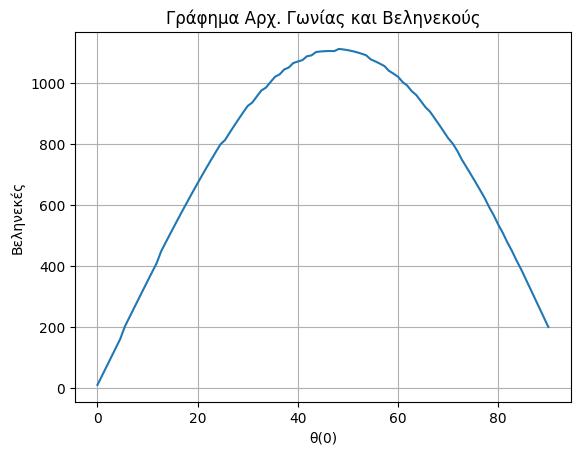

Το μέγιστο βεληνεκές είναι 1112.6535007744317 επιτυγχάνεται με αρχική γωνία ρίψης: 48.18°


In [79]:
#ΑΣΚΗΣΗ 3
#ΕΡΩΤΗΜΑ β)
g = 10
gamma_x = 1

def derivatives_x(t,x,v_x):
  dx_dt = v_x
  dv_dt = gamma_x
  return dx_dt,dv_dt

def derivatives_y(t,y,v_y):
  dy_dt = v_y
  dv_dt = -g
  return dy_dt,dv_dt

# Runge Kutta για την x διευθυνση
def rk4_x(t0,x0,v0,h,t_max):
  n = (t_max - t0) / h
  t_values = [t0]
  x_values = [x0]
  vx_values = [v0]

  t=t0
  x=x0
  vx=v0

  while t<=t_max:
    k1_x, k1_v = derivatives_x(t,x,vx)
    k2_x, k2_v = derivatives_x(t+h/2,x+k1_x*h/2,vx+k1_v*h/2)
    k3_x, k3_v = derivatives_x(t+h/2,x+k2_x*h/2,vx+k2_v*h/2)
    k4_x, k4_v = derivatives_x(t+h,x+k3_x*h,vx+k3_v*h)

    x += (h/6)*(k1_x + 2*k2_x + 2*k3_x + k4_x)
    vx += (h/6)*(k1_v + 2*k2_v + 2*k3_v + k4_v)
    t+=h
    t_values.append(t)
    x_values.append(x)
    vx_values.append(vx)
  return np.array(t_values),np.array(x_values),np.array(vx_values)

# Runge Kutta για την y διευθυνση
def rk4_y(t0,y0,v0,h,t_max):
  n = (t_max - t0) / h
  t_values = [t0]
  y_values = [y0]
  vy_values = [v0]


  t=t0
  y=y0
  vy=v0

  while t<=t_max and y>=0:
    k1_y, k1_v = derivatives_y(t,y,vy)
    k2_y, k2_v = derivatives_y(t+h/2,y+k1_y*h/2,vy+k1_v*h/2)
    k3_y, k3_v = derivatives_y(t+h/2,y+k2_y*h/2,vy+k2_v*h/2)
    k4_y, k4_v = derivatives_y(t+h,y+k3_y*h,vy+k3_v*h)

    y += (h/6)*(k1_y + 2*k2_y + 2*k3_y + k4_y)
    vy += (h/6)*(k1_v + 2*k2_v + 2*k3_v + k4_v)
    t+=h
    t_values.append(t)
    y_values.append(y)
    vy_values.append(vy)
  return np.array(t_values),np.array(y_values),np.array(vy_values)

#Αρχικες συνθηκες
t_0 = 0
x_0 = 0
y_0 = 0
th_0 = np.linspace(0,np.pi/2,100)
v_0 = 100
vx_0 = v_0*np.cos(th_0)
vy_0 = v_0*np.sin(th_0)
x_max = []

for i in range(len(th_0)):
  t,y,vy = rk4_y(t_0,y_0,vy_0[i],0.1,100)
  t,x,vx = rk4_x(t_0, x_0,vx_0[i],0.1,100)
  x_max.append(np.max(x[:len(y)]))
  #plt.plot(x[:len(y)],y, label="θ(0) = " + str(round(np.rad2deg(th_0[i]))) + "°") #Αν θελετε να δειτε την τροχια

#plt.grid()
#plt.xlabel("x")
#plt.ylabel("y")
#plt.legend()
#plt.title("Τροχιά Πλάγιας Βολής με οριζόντιο άνεμο που προκαλεί επιτάχυνση $\mathregular{1 m/s^2}$")
#plt.show()

plt.plot(np.rad2deg(th_0),x_max)
plt.grid()
plt.xlabel("θ(0)")
plt.ylabel("Βεληνεκές")
plt.title("Γράφημα Αρχ. Γωνίας και Βεληνεκούς")
plt.show()
print("Το μέγιστο βεληνεκές είναι " + str(np.max(x_max)) + " επιτυγχάνεται με αρχική γωνία ρίψης: " + str(round(np.rad2deg(th_0[np.argmax(x_max)]),2)) + "°")

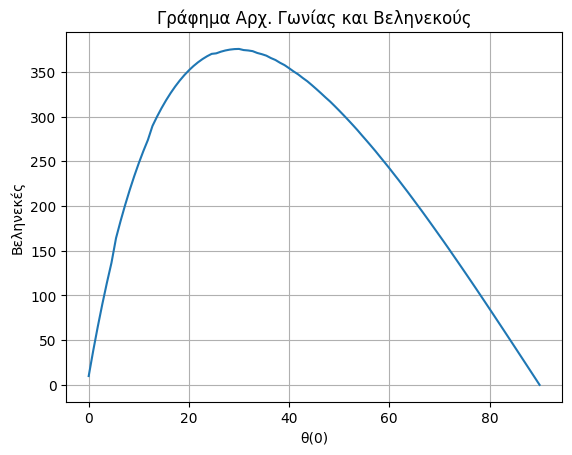

Το μέγιστο βεληνεκές είναι 375.57120037979695 επιτυγχάνεται με αρχική γωνία ρίψης: 30.0°


In [78]:
#ΑΣΚΗΣΗ 3
#ΕΡΩΤΗΜΑ γ)
g = 10
gamma_x = 0.2

def derivatives_x(t,x,v_x):
  dx_dt = v_x
  dv_dt = -gamma_x*v_x
  return dx_dt,dv_dt

def derivatives_y(t,y,v_y):
  dy_dt = v_y
  dv_dt = -g
  return dy_dt,dv_dt

# Runge Kutta για την x διευθυνση
def rk4_x(t0,x0,v0,h,t_max):
  n = (t_max - t0) / h
  t_values = [t0]
  x_values = [x0]
  vx_values = [v0]

  t=t0
  x=x0
  vx=v0

  while t<=t_max:
    k1_x, k1_v = derivatives_x(t,x,vx)
    k2_x, k2_v = derivatives_x(t+h/2,x+k1_x*h/2,vx+k1_v*h/2)
    k3_x, k3_v = derivatives_x(t+h/2,x+k2_x*h/2,vx+k2_v*h/2)
    k4_x, k4_v = derivatives_x(t+h,x+k3_x*h,vx+k3_v*h)

    x += (h/6)*(k1_x + 2*k2_x + 2*k3_x + k4_x)
    vx += (h/6)*(k1_v + 2*k2_v + 2*k3_v + k4_v)
    t+=h
    t_values.append(t)
    x_values.append(x)
    vx_values.append(vx)
  return np.array(t_values),np.array(x_values),np.array(vx_values)

# Runge Kutta για την y διευθυνση
def rk4_y(t0,y0,v0,h,t_max):
  n = (t_max - t0) / h
  t_values = [t0]
  y_values = [y0]
  vy_values = [v0]

  t=t0
  y=y0
  vy=v0

  while t<=t_max and y>=0:
    k1_y, k1_v = derivatives_y(t,y,vy)
    k2_y, k2_v = derivatives_y(t+h/2,y+k1_y*h/2,vy+k1_v*h/2)
    k3_y, k3_v = derivatives_y(t+h/2,y+k2_y*h/2,vy+k2_v*h/2)
    k4_y, k4_v = derivatives_y(t+h,y+k3_y*h,vy+k3_v*h)

    y += (h/6)*(k1_y + 2*k2_y + 2*k3_y + k4_y)
    vy += (h/6)*(k1_v + 2*k2_v + 2*k3_v + k4_v)
    t+=h
    t_values.append(t)
    y_values.append(y)
    vy_values.append(vy)
  return np.array(t_values),np.array(y_values),np.array(vy_values)

#Αρχικες συνθηκες
t_0 = 0
x_0 = 0
y_0 = 0
th_0 = np.linspace(0,np.pi/2,100)
v_0 = 100
vx_0 = v_0*np.cos(th_0)
vy_0 = v_0*np.sin(th_0)
x_max = []

for i in range(len(th_0)):
  t,y,vy = rk4_y(t_0,y_0,vy_0[i],0.1,100)
  t,x,vx = rk4_x(t_0, x_0,vx_0[i],0.1,100)
  x_max.append(np.max(x[:len(y)]))
  #plt.plot(x[:len(y)],y, label="θ(0) = " + str(round(np.rad2deg(th_0[i]))) + "°") #Αν θελετε να δειτε την τροχια

#plt.grid()
#plt.xlabel("x")
#plt.ylabel("y")
#plt.legend()
#plt.title("Τροχιά Πλάγιας βολής με αντίσταση αέρα ανάλογη της ταχύτητας")
#plt.show()

plt.plot(np.rad2deg(th_0),x_max)
plt.grid()
plt.xlabel("θ(0)")
plt.ylabel("Βεληνεκές")
plt.title("Γράφημα Αρχ. Γωνίας και Βεληνεκούς")
plt.show()
print("Το μέγιστο βεληνεκές είναι " + str(np.max(x_max)) + " επιτυγχάνεται με αρχική γωνία ρίψης: " + str(round(np.rad2deg(th_0[np.argmax(x_max)]),2)) + "°")